### Detect The account is Delinquent Account or Not

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import os,re
import warnings
from sklearn import preprocessing

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import pickle
 
warnings.filterwarnings("ignore")

In [5]:
data= pd.read_csv("credit_card.csv")

In [6]:
data

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,827695683,Blue,340,1,106,24-12-2023,Week-52,Q4,2023,34516.0,1329,3906,77,0.039,Swipe,Fuel,546.84,0
10104,827703258,Blue,395,1,104,24-12-2023,Week-52,Q4,2023,13426.0,0,4674,66,0.000,Swipe,Grocery,607.62,0
10105,827712108,Blue,125,1,107,24-12-2023,Week-52,Q4,2023,2346.0,1373,4432,72,0.585,Swipe,Bills,797.76,0
10106,827888433,Blue,410,0,96,24-12-2023,Week-52,Q4,2023,6648.0,2242,2089,60,0.337,Swipe,Bills,146.23,0


## EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client_Num             10108 non-null  int64  
 1   Card_Category          10108 non-null  object 
 2   Annual_Fees            10108 non-null  int64  
 3   Activation_30_Days     10108 non-null  int64  
 4   Customer_Acq_Cost      10108 non-null  int64  
 5   Week_Start_Date        10108 non-null  object 
 6   Week_Num               10108 non-null  object 
 7   Qtr                    10108 non-null  object 
 8   current_year           10108 non-null  int64  
 9   Credit_Limit           10108 non-null  float64
 10  Total_Revolving_Bal    10108 non-null  int64  
 11  Total_Trans_Amt        10108 non-null  int64  
 12  Total_Trans_Vol        10108 non-null  int64  
 13  Avg_Utilization_Ratio  10108 non-null  float64
 14  Use Chip               10108 non-null  object 
 15  Ex

In [8]:
data.columns

Index(['Client_Num', 'Card_Category', 'Annual_Fees', 'Activation_30_Days',
       'Customer_Acq_Cost', 'Week_Start_Date', 'Week_Num', 'Qtr',
       'current_year', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Vol', 'Avg_Utilization_Ratio',
       'Use Chip', 'Exp Type', 'Interest_Earned', 'Delinquent_Acc'],
      dtype='object')

In [9]:
data.isnull().sum()

Client_Num               0
Card_Category            0
Annual_Fees              0
Activation_30_Days       0
Customer_Acq_Cost        0
Week_Start_Date          0
Week_Num                 0
Qtr                      0
current_year             0
Credit_Limit             0
Total_Revolving_Bal      0
Total_Trans_Amt          0
Total_Trans_Vol          0
Avg_Utilization_Ratio    0
Use Chip                 0
Exp Type                 0
Interest_Earned          0
Delinquent_Acc           0
dtype: int64

In [10]:
# converting the date column in to datetime 
data['Week_Start_Date']=pd.to_datetime(data['Week_Start_Date'],format='%d-%m-%Y')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Client_Num             10108 non-null  int64         
 1   Card_Category          10108 non-null  object        
 2   Annual_Fees            10108 non-null  int64         
 3   Activation_30_Days     10108 non-null  int64         
 4   Customer_Acq_Cost      10108 non-null  int64         
 5   Week_Start_Date        10108 non-null  datetime64[ns]
 6   Week_Num               10108 non-null  object        
 7   Qtr                    10108 non-null  object        
 8   current_year           10108 non-null  int64         
 9   Credit_Limit           10108 non-null  float64       
 10  Total_Revolving_Bal    10108 non-null  int64         
 11  Total_Trans_Amt        10108 non-null  int64         
 12  Total_Trans_Vol        10108 non-null  int64         
 13  A

In [12]:
data

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,2023-01-01,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,2023-01-01,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0
2,708084558,Blue,140,0,106,2023-01-01,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0
3,708085458,Blue,250,1,150,2023-01-01,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0
4,708086958,Blue,320,1,106,2023-01-01,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,827695683,Blue,340,1,106,2023-12-24,Week-52,Q4,2023,34516.0,1329,3906,77,0.039,Swipe,Fuel,546.84,0
10104,827703258,Blue,395,1,104,2023-12-24,Week-52,Q4,2023,13426.0,0,4674,66,0.000,Swipe,Grocery,607.62,0
10105,827712108,Blue,125,1,107,2023-12-24,Week-52,Q4,2023,2346.0,1373,4432,72,0.585,Swipe,Bills,797.76,0
10106,827888433,Blue,410,0,96,2023-12-24,Week-52,Q4,2023,6648.0,2242,2089,60,0.337,Swipe,Bills,146.23,0


In [13]:
data[data.duplicated()]

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc


## Label Encoding

In [14]:
label_encoder = preprocessing.LabelEncoder()
data['Card_Category']= label_encoder.fit_transform(data['Card_Category']) 
data['Qtr']= label_encoder.fit_transform(data['Qtr'])
data['Use Chip']= label_encoder.fit_transform(data['Use Chip']) 
data['Exp Type']= label_encoder.fit_transform(data['Exp Type']) 

In [15]:
data

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,0,200,0,87,2023-01-01,Week-1,0,2023,3544.0,1661,15149,111,0.469,0,5,4393.21,0
1,708083283,0,445,1,108,2023-01-01,Week-1,0,2023,3421.0,2517,992,21,0.736,2,1,69.44,0
2,708084558,0,140,0,106,2023-01-01,Week-1,0,2023,8258.0,1771,1447,23,0.214,0,0,202.58,0
3,708085458,0,250,1,150,2023-01-01,Week-1,0,2023,1438.3,0,3940,82,0.000,1,4,236.40,0
4,708086958,0,320,1,106,2023-01-01,Week-1,0,2023,3128.0,749,4369,59,0.239,2,3,1004.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,827695683,0,340,1,106,2023-12-24,Week-52,3,2023,34516.0,1329,3906,77,0.039,2,3,546.84,0
10104,827703258,0,395,1,104,2023-12-24,Week-52,3,2023,13426.0,0,4674,66,0.000,2,4,607.62,0
10105,827712108,0,125,1,107,2023-12-24,Week-52,3,2023,2346.0,1373,4432,72,0.585,2,0,797.76,0
10106,827888433,0,410,0,96,2023-12-24,Week-52,3,2023,6648.0,2242,2089,60,0.337,2,0,146.23,0


In [16]:
data['revenue'] = data['Annual_Fees']+data['Total_Trans_Amt'] + data['Interest_Earned']

In [17]:
data

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc,revenue
0,708082083,0,200,0,87,2023-01-01,Week-1,0,2023,3544.0,1661,15149,111,0.469,0,5,4393.21,0,19742.21
1,708083283,0,445,1,108,2023-01-01,Week-1,0,2023,3421.0,2517,992,21,0.736,2,1,69.44,0,1506.44
2,708084558,0,140,0,106,2023-01-01,Week-1,0,2023,8258.0,1771,1447,23,0.214,0,0,202.58,0,1789.58
3,708085458,0,250,1,150,2023-01-01,Week-1,0,2023,1438.3,0,3940,82,0.000,1,4,236.40,0,4426.40
4,708086958,0,320,1,106,2023-01-01,Week-1,0,2023,3128.0,749,4369,59,0.239,2,3,1004.87,1,5693.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,827695683,0,340,1,106,2023-12-24,Week-52,3,2023,34516.0,1329,3906,77,0.039,2,3,546.84,0,4792.84
10104,827703258,0,395,1,104,2023-12-24,Week-52,3,2023,13426.0,0,4674,66,0.000,2,4,607.62,0,5676.62
10105,827712108,0,125,1,107,2023-12-24,Week-52,3,2023,2346.0,1373,4432,72,0.585,2,0,797.76,0,5354.76
10106,827888433,0,410,0,96,2023-12-24,Week-52,3,2023,6648.0,2242,2089,60,0.337,2,0,146.23,0,2645.23


In [18]:
cat = ['Qtr','Card_Category','Use Chip','Exp Type','Use Chip','Exp Type','Delinquent_Acc']
print("Value count:\n")
for col in cat:
    print(col,"\n",data[col].value_counts(),"\n") 

Value count:

Qtr 
 1    2535
2    2535
0    2534
3    2504
Name: Qtr, dtype: int64 

Card_Category 
 0    9214
3     639
1     188
2      67
Name: Card_Category, dtype: int64 

Use Chip 
 2    7101
0    2414
1     593
Name: Use Chip, dtype: int64 

Exp Type 
 0    2970
1    1988
3    1759
4    1502
2    1187
5     702
Name: Exp Type, dtype: int64 

Use Chip 
 2    7101
0    2414
1     593
Name: Use Chip, dtype: int64 

Exp Type 
 0    2970
1    1988
3    1759
4    1502
2    1187
5     702
Name: Exp Type, dtype: int64 

Delinquent_Acc 
 0    9494
1     614
Name: Delinquent_Acc, dtype: int64 



In [19]:
# Removing other unwanted text
import string

def clean_text(text):
    text = re.sub('Week-', '', text)
    return text

clean = lambda x: clean_text(x)
data["Week_num2"] = data["Week_Num"].apply(clean_text) # Clean The Text

In [20]:
data

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc,revenue,Week_num2
0,708082083,0,200,0,87,2023-01-01,Week-1,0,2023,3544.0,1661,15149,111,0.469,0,5,4393.21,0,19742.21,1
1,708083283,0,445,1,108,2023-01-01,Week-1,0,2023,3421.0,2517,992,21,0.736,2,1,69.44,0,1506.44,1
2,708084558,0,140,0,106,2023-01-01,Week-1,0,2023,8258.0,1771,1447,23,0.214,0,0,202.58,0,1789.58,1
3,708085458,0,250,1,150,2023-01-01,Week-1,0,2023,1438.3,0,3940,82,0.000,1,4,236.40,0,4426.40,1
4,708086958,0,320,1,106,2023-01-01,Week-1,0,2023,3128.0,749,4369,59,0.239,2,3,1004.87,1,5693.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,827695683,0,340,1,106,2023-12-24,Week-52,3,2023,34516.0,1329,3906,77,0.039,2,3,546.84,0,4792.84,52
10104,827703258,0,395,1,104,2023-12-24,Week-52,3,2023,13426.0,0,4674,66,0.000,2,4,607.62,0,5676.62,52
10105,827712108,0,125,1,107,2023-12-24,Week-52,3,2023,2346.0,1373,4432,72,0.585,2,0,797.76,0,5354.76,52
10106,827888433,0,410,0,96,2023-12-24,Week-52,3,2023,6648.0,2242,2089,60,0.337,2,0,146.23,0,2645.23,52


In [21]:
#Drop col
col_to_drop = ['Client_Num','Week_Num','Week_Start_Date','Interest_Earned','Total_Trans_Vol','Annual_Fees','current_year','Total_Trans_Amt']
data = data.drop(columns=col_to_drop)

In [22]:
revenue_col = data.pop('revenue')
week_num2_col = data.pop('Week_num2')

data.insert(data.columns.get_loc('Delinquent_Acc'), 'revenue', revenue_col)
data.insert(data.columns.get_loc('Qtr'), 'Week_num2', week_num2_col)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Card_Category          10108 non-null  int32  
 1   Activation_30_Days     10108 non-null  int64  
 2   Customer_Acq_Cost      10108 non-null  int64  
 3   Week_num2              10108 non-null  object 
 4   Qtr                    10108 non-null  int32  
 5   Credit_Limit           10108 non-null  float64
 6   Total_Revolving_Bal    10108 non-null  int64  
 7   Avg_Utilization_Ratio  10108 non-null  float64
 8   Use Chip               10108 non-null  int32  
 9   Exp Type               10108 non-null  int32  
 10  revenue                10108 non-null  float64
 11  Delinquent_Acc         10108 non-null  int64  
dtypes: float64(3), int32(4), int64(4), object(1)
memory usage: 789.8+ KB


In [24]:
data.columns

Index(['Card_Category', 'Activation_30_Days', 'Customer_Acq_Cost', 'Week_num2',
       'Qtr', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio',
       'Use Chip', 'Exp Type', 'revenue', 'Delinquent_Acc'],
      dtype='object')

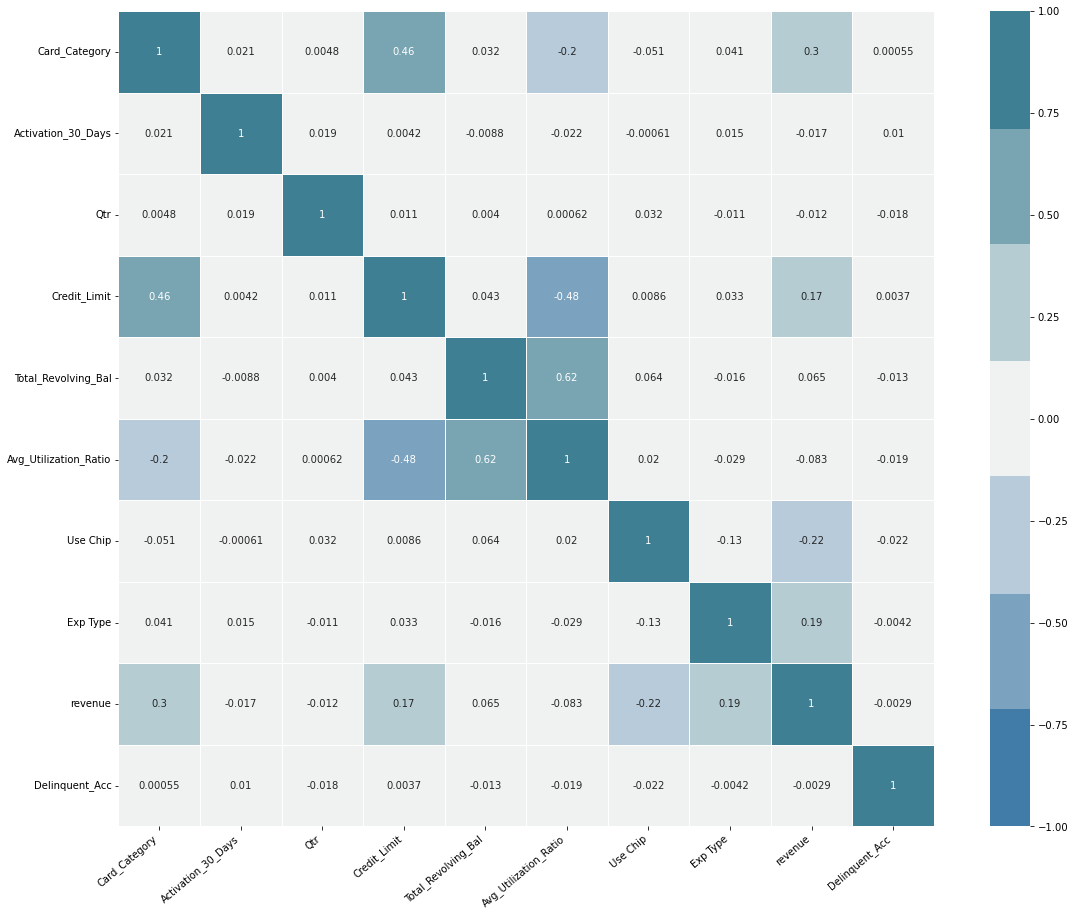

In [25]:
col = ['Card_Category','Activation_30_Days','Qtr','Credit_Limit',
       'Total_Revolving_Bal','Avg_Utilization_Ratio','Use Chip','Exp Type','revenue','Delinquent_Acc']
corr = data[col].corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    
    corr, 
    vmin=-1, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(240, 220, n=7),
    square=True,
    linewidths=.5,

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,
    horizontalalignment='right'
    
);

## Outlier Detection

<AxesSubplot:>

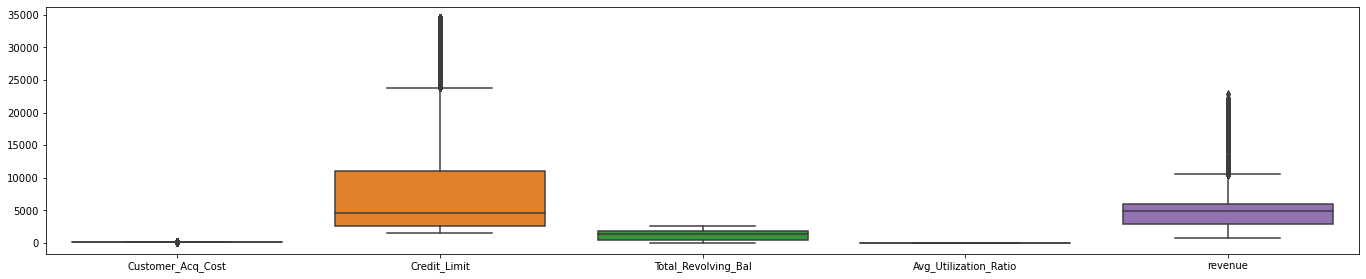

In [26]:
col = ['Customer_Acq_Cost','Credit_Limit','Total_Revolving_Bal','Avg_Utilization_Ratio', 'revenue']
plt.figure(figsize=(80,10))
plt.subplot(2,3,1)   
sns.boxplot(data=data[col])

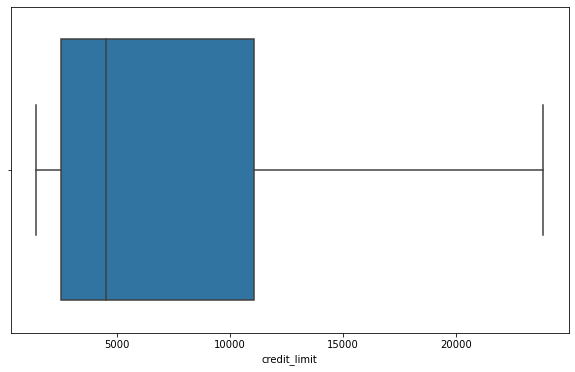

In [27]:
# Treat outliers using IQR method
plt.figure(figsize=(10,6))
q1 = data['Credit_Limit'].quantile(0.25)
q3 = data['Credit_Limit'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data['credit_limit'] = data['Credit_Limit'].clip(lower=lower_bound, upper=upper_bound)

# Generate box plot of treated data
sns.boxplot(data=data, x='credit_limit', showfliers=False)


# Show the plot
plt.show()

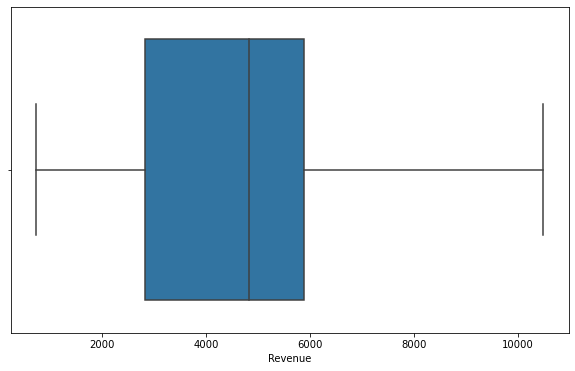

In [28]:
# Treat outliers using IQR method
plt.figure(figsize=(10,6))
q1 = data['revenue'].quantile(0.25)
q3 = data['revenue'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data['Revenue'] = data['revenue'].clip(lower=lower_bound, upper=upper_bound)

# Generate box plot of treated data
sns.boxplot(data=data, x='Revenue', showfliers=False)

# Show the plot
plt.show()

In [29]:
#Drop col
col_to_drop = ['Credit_Limit','revenue','Week_num2','Qtr','Use Chip']
data = data.drop(columns=col_to_drop)

In [30]:
revenue_col = data.pop('Revenue')
credit_limit_col = data.pop('credit_limit')

data.insert(data.columns.get_loc('Delinquent_Acc'), 'Revenue', revenue_col)
data.insert(data.columns.get_loc('Total_Revolving_Bal'), 'credit_limit', credit_limit_col)

In [31]:
data

,Card_Category,Activation_30_Days,Customer_Acq_Cost,credit_limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Exp Type,Revenue,Delinquent_Acc
0,0,0,87,3544.0,1661,0.469,5,10494.6575,0
1,0,1,108,3421.0,2517,0.736,1,1506.4400,0
2,0,0,106,8258.0,1771,0.214,0,1789.5800,0
3,0,1,150,1438.3,0,0.000,4,4426.4000,0
4,0,1,106,3128.0,749,0.239,3,5693.8700,1
...,...,...,...,...,...,...,...,...,...
10103,0,1,106,23846.5,1329,0.039,3,4792.8400,0
10104,0,1,104,13426.0,0,0.000,4,5676.6200,0
10105,0,1,107,2346.0,1373,0.585,0,5354.7600,0
10106,0,0,96,6648.0,2242,0.337,0,2645.2300,0


<AxesSubplot:>

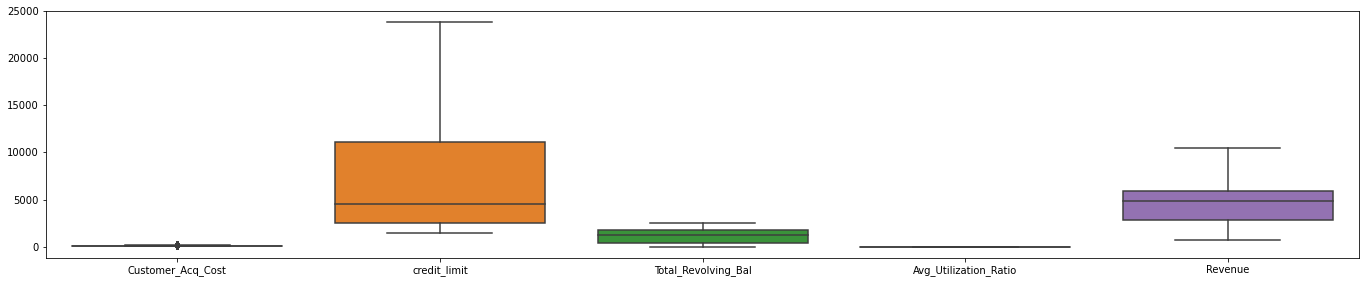

In [32]:
col = ['Customer_Acq_Cost','credit_limit','Total_Revolving_Bal','Avg_Utilization_Ratio', 'Revenue']
plt.figure(figsize=(80,10))
plt.subplot(2,3,1)   
sns.boxplot(data=data[col])

In [33]:
# feature Scaling of 'credit_limit','Revenue','Avg_Utilization_Ratio'
col_tarnsform = ['credit_limit', 'Revenue','Avg_Utilization_Ratio']
#from sklearn .preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MaxAbsScaler

# Applying MaxAbsScaler
scaler = MaxAbsScaler()

# Assuming df is your DataFrame and 'cols_to_normalize' are the columns you want to normalize
#scaler = StandardScaler()
data[col_tarnsform] = scaler.fit_transform(data[col_tarnsform])


In [34]:
data

,Card_Category,Activation_30_Days,Customer_Acq_Cost,credit_limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Exp Type,Revenue,Delinquent_Acc
0,0,0,87,0.148617,1661,0.469469,5,1.000000,0
1,0,1,108,0.143459,2517,0.736737,1,0.143544,0
2,0,0,106,0.346298,1771,0.214214,0,0.170523,0
3,0,1,150,0.060315,0,0.000000,4,0.421777,0
4,0,1,106,0.131172,749,0.239239,3,0.542549,1
...,...,...,...,...,...,...,...,...,...
10103,0,1,106,1.000000,1329,0.039039,3,0.456693,0
10104,0,1,104,0.563018,0,0.000000,4,0.540906,0
10105,0,1,107,0.098379,1373,0.585586,0,0.510237,0
10106,0,0,96,0.278783,2242,0.337337,0,0.252055,0


In [35]:
## Train Test Split

In [36]:
# Slice the data
x= data.iloc[:,0:8]
y=data['Delinquent_Acc']
x.shape,y.shape

((10108, 8), (10108,))

In [37]:
y.value_counts()

0    9494
1     614
Name: Delinquent_Acc, dtype: int64

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [39]:
x_train

,Card_Category,Activation_30_Days,Customer_Acq_Cost,credit_limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Exp Type,Revenue
3315,0,0,61,0.176546,1597,0.379379,1,0.466517
7077,0,1,102,0.194997,1162,0.250250,0,0.951029
9817,0,1,44,0.672384,1597,0.100100,4,0.419836
5266,1,1,107,1.000000,0,0.000000,0,0.641575
9019,0,0,96,0.338708,0,0.000000,0,0.140045
...,...,...,...,...,...,...,...,...
9225,0,1,115,0.145808,0,0.000000,5,0.261403
4859,0,1,103,0.185688,0,0.000000,3,0.304818
3264,0,0,75,0.113266,1572,0.582583,3,0.211714
9845,0,0,96,1.000000,2027,0.071071,1,1.000000


In [40]:
y_train.value_counts()

0    6666
1     409
Name: Delinquent_Acc, dtype: int64

In [41]:
bag_c=BaggingClassifier()
bag1 =bag_c.fit(x_train,y_train)
bag1.score(x_train,y_train)

0.9871378091872791

In [42]:
bag1.score(x_test,y_test)

0.9314210352786021

# Model Evaluation

In [43]:
pred = np.array([0,1,106,1.000000,1329,0.039039,3,0.456693])
pred = pred.reshape(1,-1)

if bag1.predict(pred) == 1:
    print("Delinquent Account")
else:
        print("Not Delinquent Account")


Not Delinquent Account


## Pickel File

In [44]:
import pickle

In [45]:
filename = 'final_Bagging_model.pkl'
pickle.dump(bag_c, open(filename,'wb'))

In [46]:
pickled_model=pickle.load(open('final_Bagging_model.pkl','rb'))

In [47]:
pickled_model.fit(x,y)
pk=pickled_model.predict(x_test)
pk

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)